In [282]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show, show_hist
import numpy as np
import seaborn as sns
sns.set_context('paper')
import sys
sys.path.insert(0, '../snow_terrain_tiles/')
from dem_utils import read_dem#recursive_rasterstats_to_dict
from dem_utils import recursive_rastersstats_to_dict
from mpl_toolkits.axes_grid1 import make_axes_locatable
from directional_terrain_analysis import make_hillshade
import os
import matplotlib.gridspec as gridspec



In [283]:
d1 = recursive_rastersstats_to_dict('../subsets/')
d2 = recursive_rastersstats_to_dict('../subsets/', '*dem.tif')

Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.


/home/cparr/miniconda3/envs/masters/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


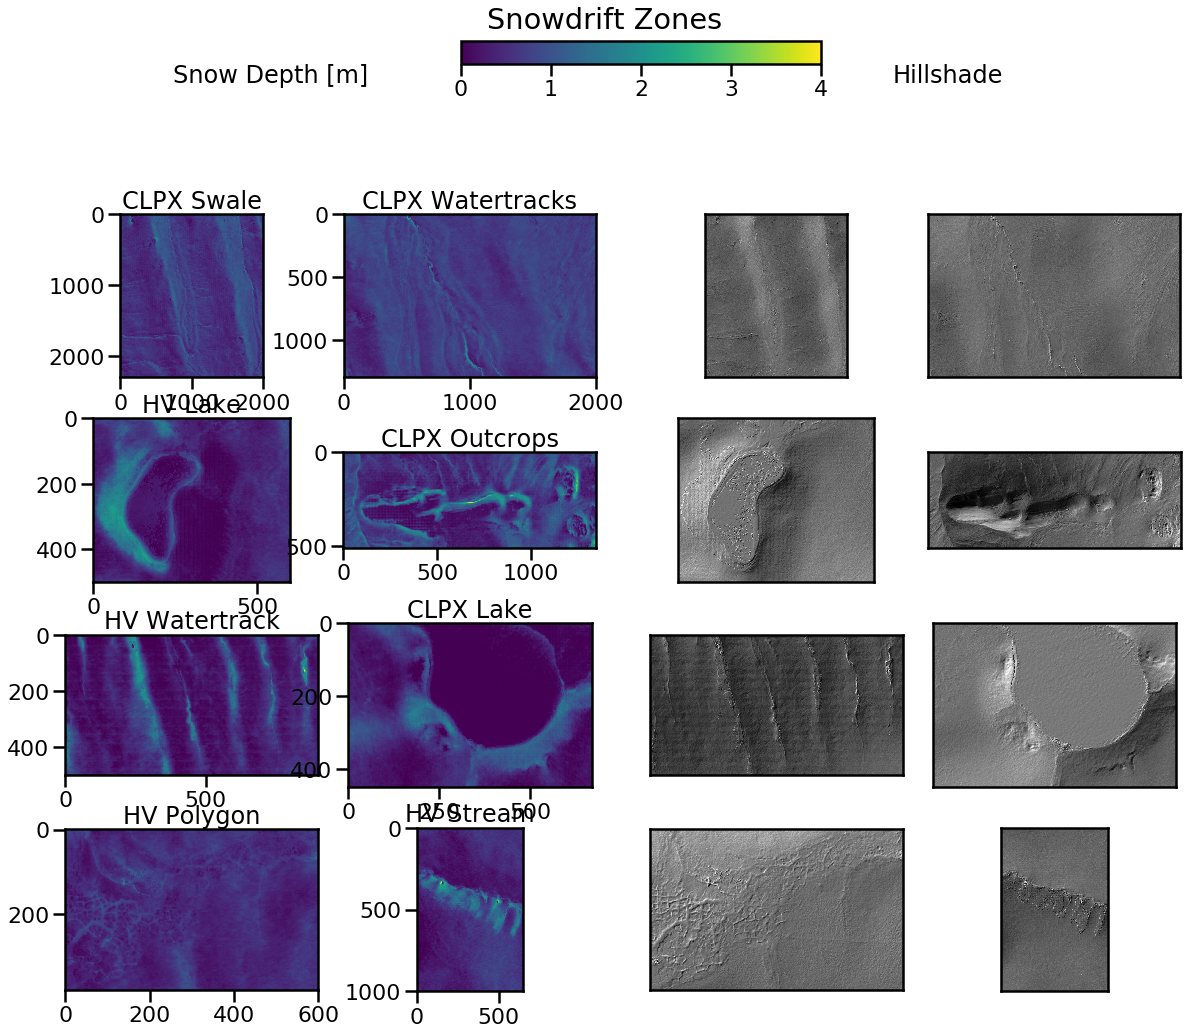

In [280]:

fig = plt.figure(figsize=(20, 16))
outer = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.2)


inner1 = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[0], wspace=0.1, hspace=0.25)


inner2 = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[1], wspace=0.1, hspace=0.25)



arrs = []
titles = []

for i in range(2):
    


    if i == 0:
        d = d1
        g = inner1
    else:
        d = d2
        g = inner2

    for k in d.keys():
        arrs.append(d[k]['arr'])
        titles.append(k)
 

titles = [(os.path.basename(t).split('_')[0].upper() + ' ' +  os.path.basename(t).split('_')[1].capitalize()) for t in titles]
    
for j in range(len(titles)):
    if j < 8:
        ax = plt.Subplot(fig, inner1[j])
        im = ax.imshow(arrs[j], cmap='viridis', interpolation='nearest', vmin=0, vmax=4)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[j])
        fig.add_subplot(ax)
    else:
        ax = plt.Subplot(fig, inner2[j - 8])
        vmin = np.nanmin(arrs[j])
        vmax = np.nanmax(arrs[j])
        ax.imshow(make_hillshade(arrs[j]*3, 315, 30), cmap='Greys')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('')
        fig.add_subplot(ax)
              

fig.text(0.2, 0.92, "Snow Depth [m]", va="center", ha="left")
fig.text(0.7, 0.92, "Hillshade", va="center", ha="left")
fig.suptitle('Snowdrift Zones')

fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.4, 0.93, 0.25, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

fig.show()
plt.savefig('../subsets/agg_results/subsets.png', bbox_inches='tight', dpi=300)

Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.


/home/cparr/miniconda3/envs/masters/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


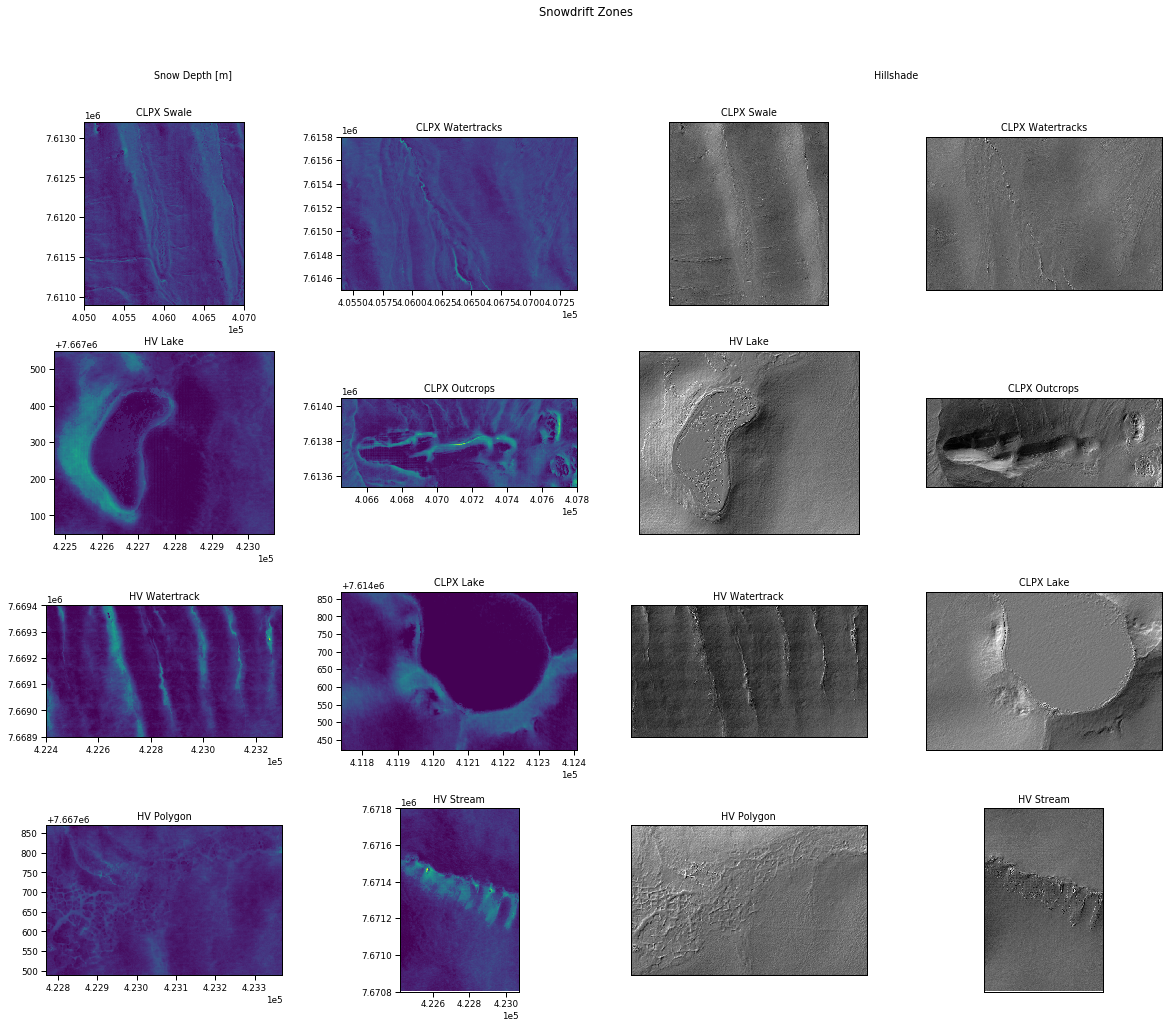

In [337]:
# with ticks?

fig = plt.figure(figsize=(20, 16))
outer = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.2)


inner1 = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[0], wspace=0.25, hspace=0.25)


inner2 = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[1], wspace=0.25, hspace=0.25)

arrs = []
titles = []
for i in range(2):
    if i == 0:
        d = d1
        g = inner1
    else:
        d = d2
        g = inner2
    for k in d.keys():
        arrs.append(d[k]['arr'])
        titles.append(k)
 

ptitles = [(os.path.basename(t).split('_')[0].upper() + ' ' +  os.path.basename(t).split('_')[1].capitalize()) for t in titles]
    
for j in range(len(titles)):
    if j < 8:
        ax = plt.Subplot(fig, inner1[j])
        src = rasterio.open(list(d1.keys())[j])        
        im = show(src, ax=ax, vmin=0, vmax=4, with_bounds=True)
        ax.ticklabel_format(axis='both', style='sci', scilimits=(0,3))
        ax.set_title(ptitles[j])
        fig.add_subplot(ax)
    else:
        ax = plt.Subplot(fig, inner2[j - 8])
        vmin = np.nanmin(arrs[j])
        vmax = np.nanmax(arrs[j])
        ax.imshow(make_hillshade(arrs[j]*3, 315, 30), cmap='Greys')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(ptitles[j])
        fig.add_subplot(ax)
             
#labels = [item.get_text() for item in fig.axes[1].get_xticklabels()]
#print(labels)
#fig.axes[1].set_xticklabels(labels, rotation=315)

fig.text(0.2, 0.92, "Snow Depth [m]", va="center", ha="left")
fig.text(0.7, 0.92, "Hillshade", va="center", ha="left")
fig.suptitle('Snowdrift Zones')

# fig.subplots_adjust(top=0.8)
# cbar_ax = fig.add_axes([0.4, 0.93, 0.25, 0.02])
# fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

fig.show()
#plt.savefig('../subsets/agg_results/subsets.png', bbox_inches='tight', dpi=300)
# divider = make_axes_locatable(fig.axes[0])
# cax = divider.append_axes('top', size='20%', xref=0.35, yref=0.92)
# cax
#fig.colorbar(im, cax=cax, orientation='horizontal')

#fig.show()    


['4.0525', '4.0550', '4.0575', '4.0600', '4.0625', '4.0650', '4.0675', '4.0700', '4.0725', '4.0750']


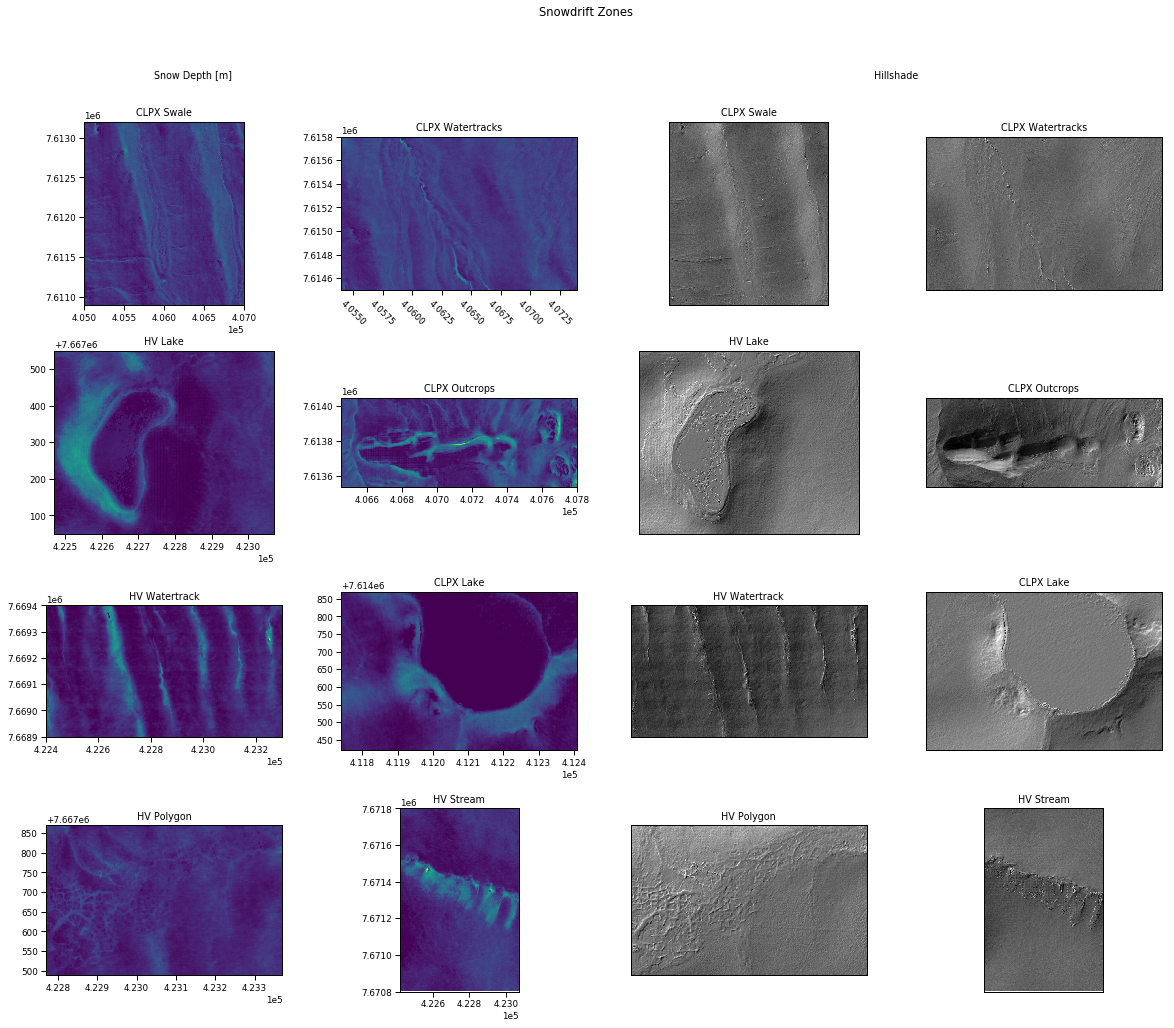

In [339]:
labels = [item.get_text() for item in fig.axes[1].get_xticklabels()]
print(labels)
fig.axes[1].set_xticklabels(labels, rotation=315)
fig

In [27]:


def plot_comparison_inputs(d, vmin=0, vmax=4):
#def plot_comparison_inputs(d, outpath, vmin=0, vmax=4):

    # To plot all the inputs
    arrs = []
    titles = []
    for k in d.keys():
        arrs.append(d[k]['arr'])
        titles.append(os.path.basename(k))

    titles = [t.replace("snow_depth_2018.tif", "") for t in titles]

    len(titles) == len(arrs)

    fig, axes = plt.subplots(figsize=(16, 10),
                             nrows=3,
                             ncols=2)

    for t, a, ax in zip(titles, arrs, axes.flat):
        im = ax.imshow(a, cmap='viridis',
                       interpolation='nearest',
                       vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(t)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')

#     pname = [s.split('/')[-1] for s in list(d.keys())][0][:-9] + '.png'

#     sptitle = ''.join(x.capitalize()+' ' or '_' for x in
#                       pname[0:-4].split('_'))
#     sptitle += '[m]'
#     fig.suptitle(sptitle)

#     outpath = os.path.join(outpath + pname)
#     plt.savefig(outpath, bbox_inches='tight', dpi=300)
#     plt.close()

In [247]:
cax.axes.

SyntaxError: invalid syntax (<ipython-input-247-abc13e090df8>, line 1)

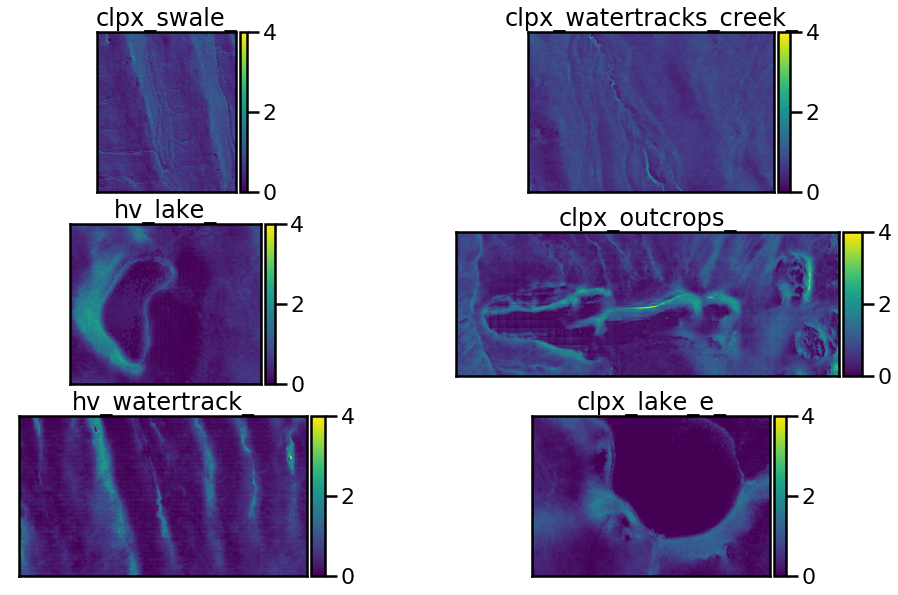

In [28]:
plot_comparison_inputs(d, vmin=0, vmax=4)

In [ ]:
rastersstats_to_dict('../subsets/clpx_lake_e/raster/snow_depth/clpx_lake_e_snow_depth_201')

In [ ]:
arrs = []
    titles = []
    for k in syr.keys():
        for j in syr[k].keys():
            if syr[k][j].shape:
                arrs.append(syr[k][j])
                titles.append(j)

    titles = list(syr.keys()) + titles
    titles.remove('arr')
    titles.remove('arr')
    titles.remove('results')
    pt = [t if 'arr' not in t else t[:-4].upper() for t in titles]

    len(pt) == len(arrs)

    fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=2)
    fig.suptitle(pname)

    for t, a, ax in zip(pt, arrs, axes.flat):
        im = ax.imshow(a, cmap='viridis',
                       interpolation='nearest',
                       vmin=a.min(), vmax=a.max())
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(t)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')

    outpath = os.path.join(outpath + pname + '.png')
    outpath = outpath.replace(' ', '_')

    plt.savefig(outpath, bbox_inches='tight', dpi=300)
    plt.close()

In [ ]:
argparse

In [ ]:
src = rasterio.open('../DEMs/clpx/bare_earth/clpx_dem_final.tif')
arr = src.read(1)
vmin = sorted(np.unique(arr))[1] * 1.02
vmax = sorted(np.unique(arr))[-1] * 0.98
print(vmin*1.02,vmax*.98)

In [ ]:
src = rasterio.open('../DEMs/hv/bare_earth/hillshade/hv_default_hillshade.tif')

In [ ]:
fig, ax = plt.subplots(figsize=(10,16))
ax.set_title('Happy Valley Hillshade (Multidirectional)')
ax.set_ylabel('UTM N Zone 6N')
ax.set_xlabel('UTM E Zone 6N')
show((src, 1), with_bounds=True, cmap='Greys', ax=ax)
plt.savefig('../figures/hv_multi_hillshade.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
src = rasterio.open('../DEMs/clpx/bare_earth/clpx_dem_final.tif')
show_hist(src, bins=50, title = 'CLPX Elevation Distribution', ax=ax, histtype='stepfilled', alpha=0.3)
ax.set_xlabel('Elevation [m]')
plt.savefig('../figures/clpx_dem_hist.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
src = rasterio.open('../DEMs/hv/bare_earth/hv_dem_final.tif')
show_hist(src, bins=50, title = 'Happy Valley Elevation Distribution', ax=ax, histtype='stepfilled', alpha=0.3)
ax.set_xlabel('Elevation [m]')
plt.savefig('../figures/hv_dem_hist.png', dpi=300, bbox_inches='tight')